<a href="https://colab.research.google.com/github/Esaiasson/Machine_learning_WS_2025/blob/main/Dataset_depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
pip install liac-arff

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arff
from io import StringIO

The data is in the format of a .arfff file. To process this format, the library liac-arff is used.


In [95]:
with open('depression_data.arff', 'r', encoding='utf-8') as f:
    datafile = arff.load(f)

df = pd.DataFrame(datafile['data'], columns=[attr[0] for attr in datafile['attributes']])

df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


The dataset contains 27901 records, and 17 attributes

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

The categorical attributes was imported with the datatype object, below they are converted to the category datatype.


In [99]:
cat_columns = ["Gender", "Profession", "City", "Academic Pressure", "Study Satisfaction", "Financial Stress", "Sleep Duration", "Dietary Habits", "Degree", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness", "Depression"]

for col in cat_columns:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27901 non-null  category
 1   Age                                    27901 non-null  float64 
 2   City                                   27901 non-null  category
 3   Profession                             27901 non-null  category
 4   Academic Pressure                      27901 non-null  category
 5   Work Pressure                          27901 non-null  float64 
 6   CGPA                                   27901 non-null  float64 
 7   Study Satisfaction                     27901 non-null  category
 8   Job Satisfaction                       27901 non-null  float64 
 9   Sleep Duration                         27901 non-null  category
 10  Dietary Habits                         27901 non-null  cat

Too have a consistency in the naming structure, across both dataset we are using, the attribute names are changed to lowercase letters with underscore instead of spaces.

In [100]:
df.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Profession': 'profession',
    'City': 'city',
    'Academic Pressure': 'academic_pressure',
    'Work Pressure': 'work_pressure',
    'CGPA': 'cgpa',
    'Study Satisfaction': 'study_satisfaction',
    'Job Satisfaction': 'job_satisfaction',
    'Sleep Duration': 'sleep_duration',
    'Dietary Habits': 'dietary_habits',
    'Degree': 'degree',
    'Have you ever had suicidal thoughts ?': 'suicidal_thoughts',
    'Work/Study Hours': 'study_hours',
    'Financial Stress': 'financial_stress',
    'Family History of Mental Illness': 'family_mental_ilness',
    'Depression': 'depression'
    }, inplace=True)

df.head()

,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,study_hours,financial_stress,family_mental_ilness,depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


For future tasks involving creating models based on the data, "Yes" and "No" values are replaced with 1 and 0.

In [101]:
df = df.replace({'Yes': 1, 'No': 0})
df.head()

/tmp/ipython-input-2603365403.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-2603365403.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df = df.replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-2603365403.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d

,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,study_hours,financial_stress,family_mental_ilness,depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0


We also want to find the rows with NA values in any of the columns. In this case there is only three rows with NA-values and we have therefore choosen to remove them from the dataset completly instead of trying to extrapolate the values through some methods since the small number of rows means that there is no real impact on our sample size.

In [102]:
null_data_index = df[df.isnull().any(axis=1)].index
null_data_index

Index([4458, 13596, 19266], dtype='int64')

In [103]:
df.drop(null_data_index, inplace=True)
null_data = df[df.isnull().any(axis=1)]
null_data

,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,study_hours,financial_stress,family_mental_ilness,depression


<Figure size 1200x600 with 0 Axes>

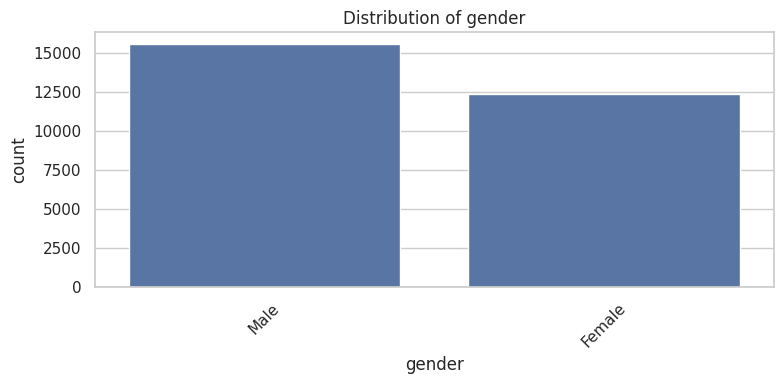

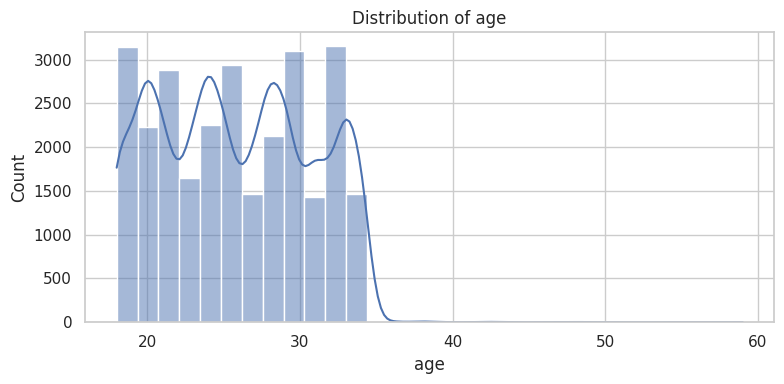

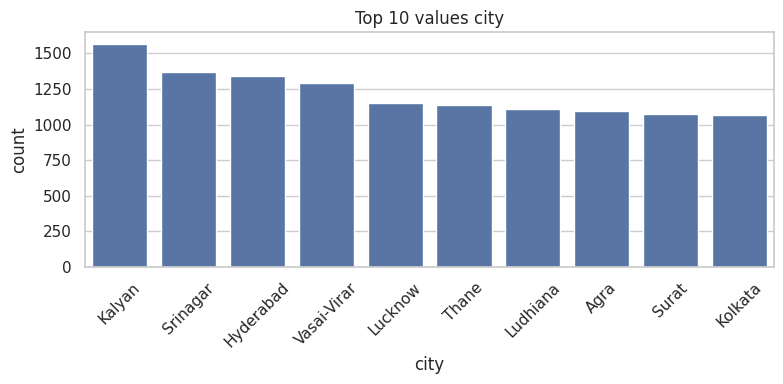

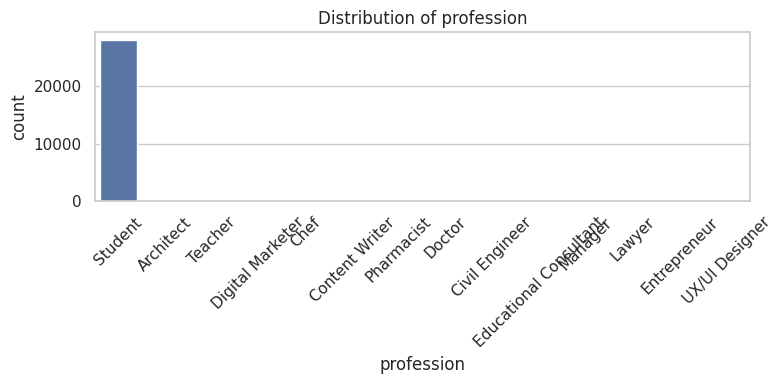

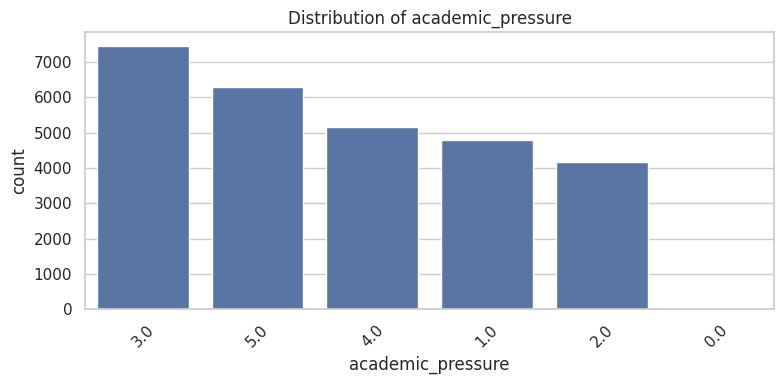

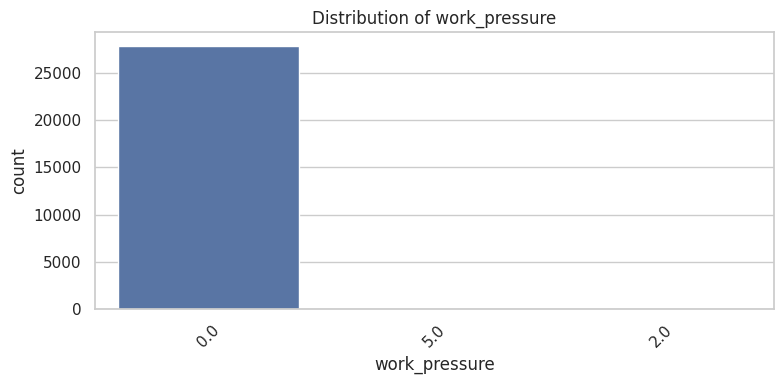

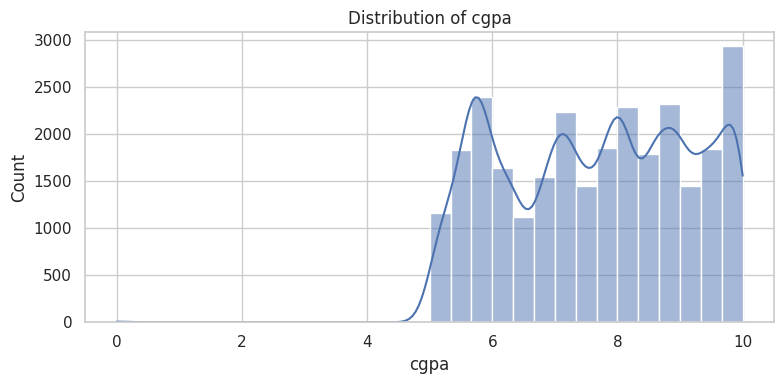

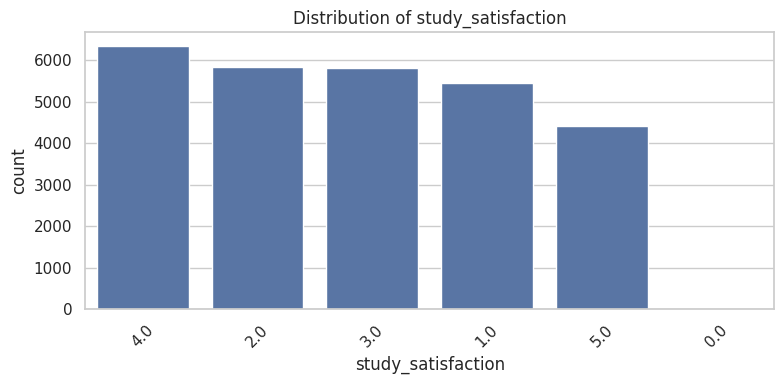

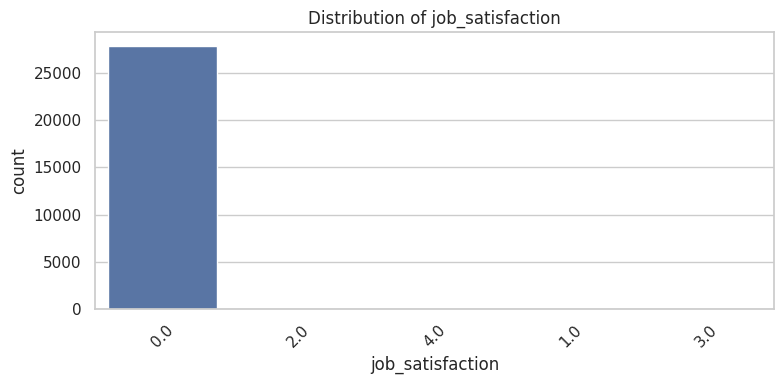

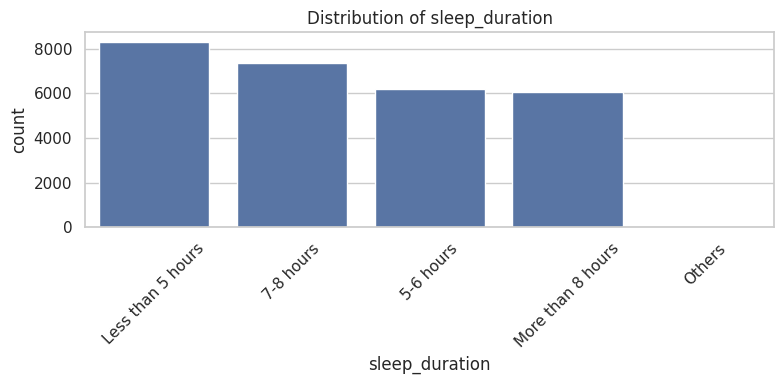

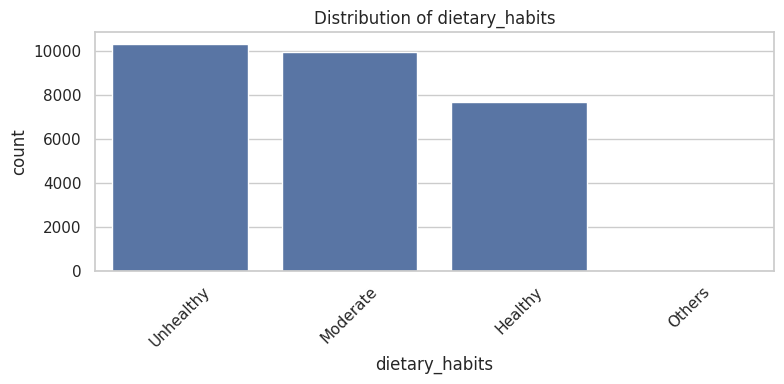

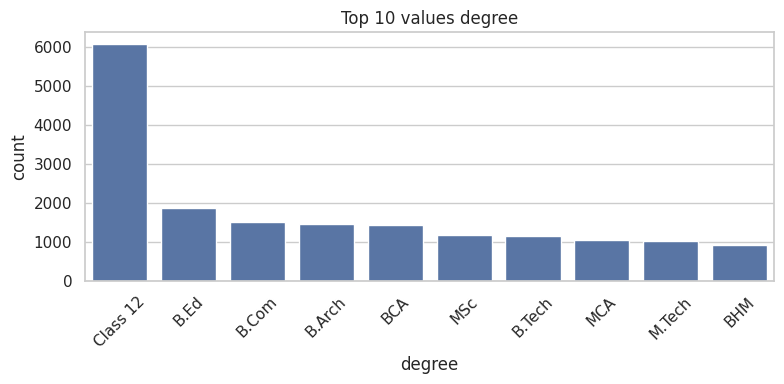

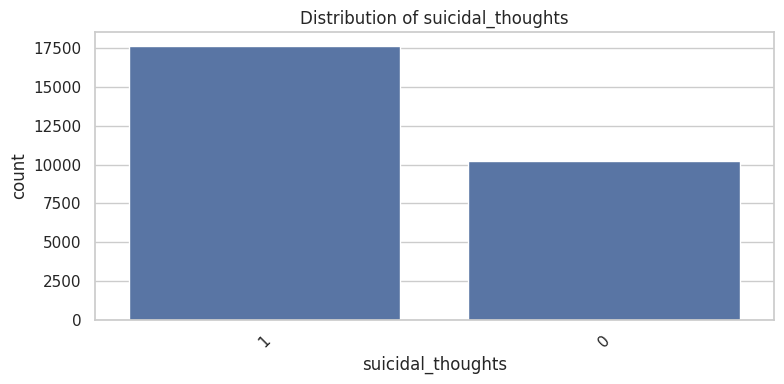

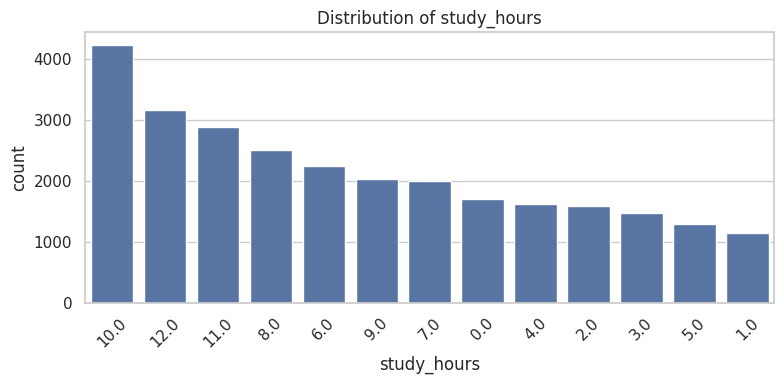

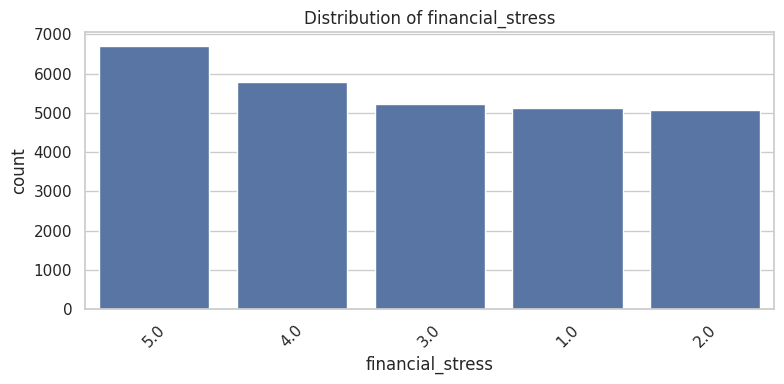

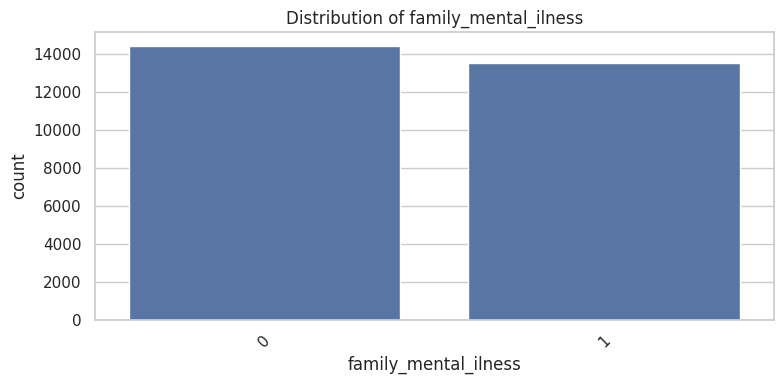

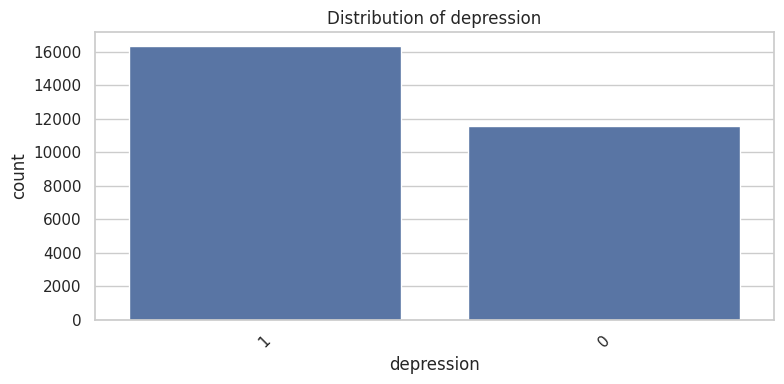

In [105]:
# features and target distribution
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

for col in df.columns:
    plt.figure(figsize=(8, 4))

    if df[col].dtype == 'category' or df[col].nunique() < 15:
        if col == "city" or col == "degree":
          sns.countplot(x=col, data=df, order=df[col].value_counts().iloc[:10].index)
          plt.title(f'Top 10 values {col}')
          plt.xticks(rotation=45)
        else:
          sns.countplot(x=col, data=df, order=df[col].value_counts().index)
          plt.title(f'Distribution of {col}')
          plt.xticks(rotation=45)
    else:
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()




Some valuable information that can be derived from these plots are that the attributes "Job Satisfaction" and "Work Pressure" contains no other values then 0. The same applies to the attribute "Profession", where the only value pressent in the data is "Student". It could make sense to keep these attributes if the data would be used to create models, in later stages, that predicts depression in people in general. That would however mean that this data is heavily biased towards students and not very usefull by itself. If instead we decide to only model depression in the specific group of students, then the data is not biased in the same way, and removing the attributes is the most reasonable. We will therefore proced with removing theses attributes, and only create models for students with the data.  


In [106]:
df = df.drop(['job_satisfaction', 'work_pressure', 'profession'], axis=1)
df.head()

,gender,age,city,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,study_hours,financial_stress,family_mental_ilness,depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,0,3.0,2.0,1,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,0,9.0,1.0,1,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,1,4.0,5.0,1,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,1,1.0,1.0,0,0
